It is important to test the robustness of the model

In [2]:
import copy

from functions import find_peaks, display_atoms, display_topomap, display_ffts



In [3]:
# Here, we load the data from a sleep stage dataset from one single subject.
# We separate the resultant epochs into their stage so we can analyse if there is
# some pattern that the CSC model can recognize to distinguish between stages.

from mne_data import load_data, separate_sleep_stages

sfreq = 100

t_lim = (0, 30 - 1/sfreq)
X, info = load_data(dataset='sleep', epoch=t_lim, sfreq=sfreq)

X_stages = separate_sleep_stages(X, info)

stages = ['Sleep stage W','Sleep stage 1','Sleep stage 2','Sleep stage 3/4','Sleep stage R']


In [4]:
X_stages['Sleep stage 1'][:,None,:].shape

(218, 1, 1, 3000)

In [5]:
# Next, we define the parameters for multivariate CSC

# First, for solving the optimization problem using data from all stages
from alphacsc import BatchCDL

# Define the shape of the dictionary
n_atoms = 8
n_times_atom = int(round(sfreq * 1.0))  # 1000. ms

cdl = BatchCDL(
    # Shape of the dictionary
    n_atoms=n_atoms,
    n_times_atom=n_times_atom,
    # Request a rank1 dictionary with unit norm temporal and spatial maps
    rank1=True, uv_constraint='separate',
    # Initialize the dictionary with random chunk from the data
    D_init='chunk',
    # rescale the regularization parameter to be 20% of lambda_max
    lmbd_max="scaled", reg=.2,
    # Number of iteration for the alternate minimization and cvg threshold
    n_iter=100, eps=1e-4,
    # solver for the z-step
    solver_z="lgcd", solver_z_kwargs={'tol': 1e-2, 'max_iter': 1000},
    # solver for the d-step
    solver_d='alternate_adaptive', solver_d_kwargs={'max_iter': 300},
    # Technical parameters
    verbose=1, random_state=0, n_jobs=6)

# Here, we define for each of the stages individually, so we search for less atoms
n_atoms_stage = 4
n_times_atom = int(round(sfreq * 1.0))  # 1000. ms

cdl_stage = BatchCDL(
    # Shape of the dictionary
    n_atoms=n_atoms_stage,
    n_times_atom=n_times_atom,
    # Request a rank1 dictionary with unit norm temporal and spatial maps
    rank1=True, uv_constraint='separate',
    # Initialize the dictionary with random chunk from the data
    D_init='chunk',
    # rescale the regularization parameter to be 20% of lambda_max
    lmbd_max="scaled", reg=.2,
    # Number of iteration for the alternate minimization and cvg threshold
    n_iter=100, eps=1e-4,
    # solver for the z-step
    solver_z="lgcd", solver_z_kwargs={'tol': 1e-2, 'max_iter': 1000},
    # solver for the d-step
    solver_d='alternate_adaptive', solver_d_kwargs={'max_iter': 300},
    # Technical parameters
    verbose=1, random_state=0, n_jobs=6)


..................
[BatchCDL] Converged after 18 iteration, (dz, du) = 7.890e-05, 5.354e-05
[BatchCDL] Fit in 855.2s


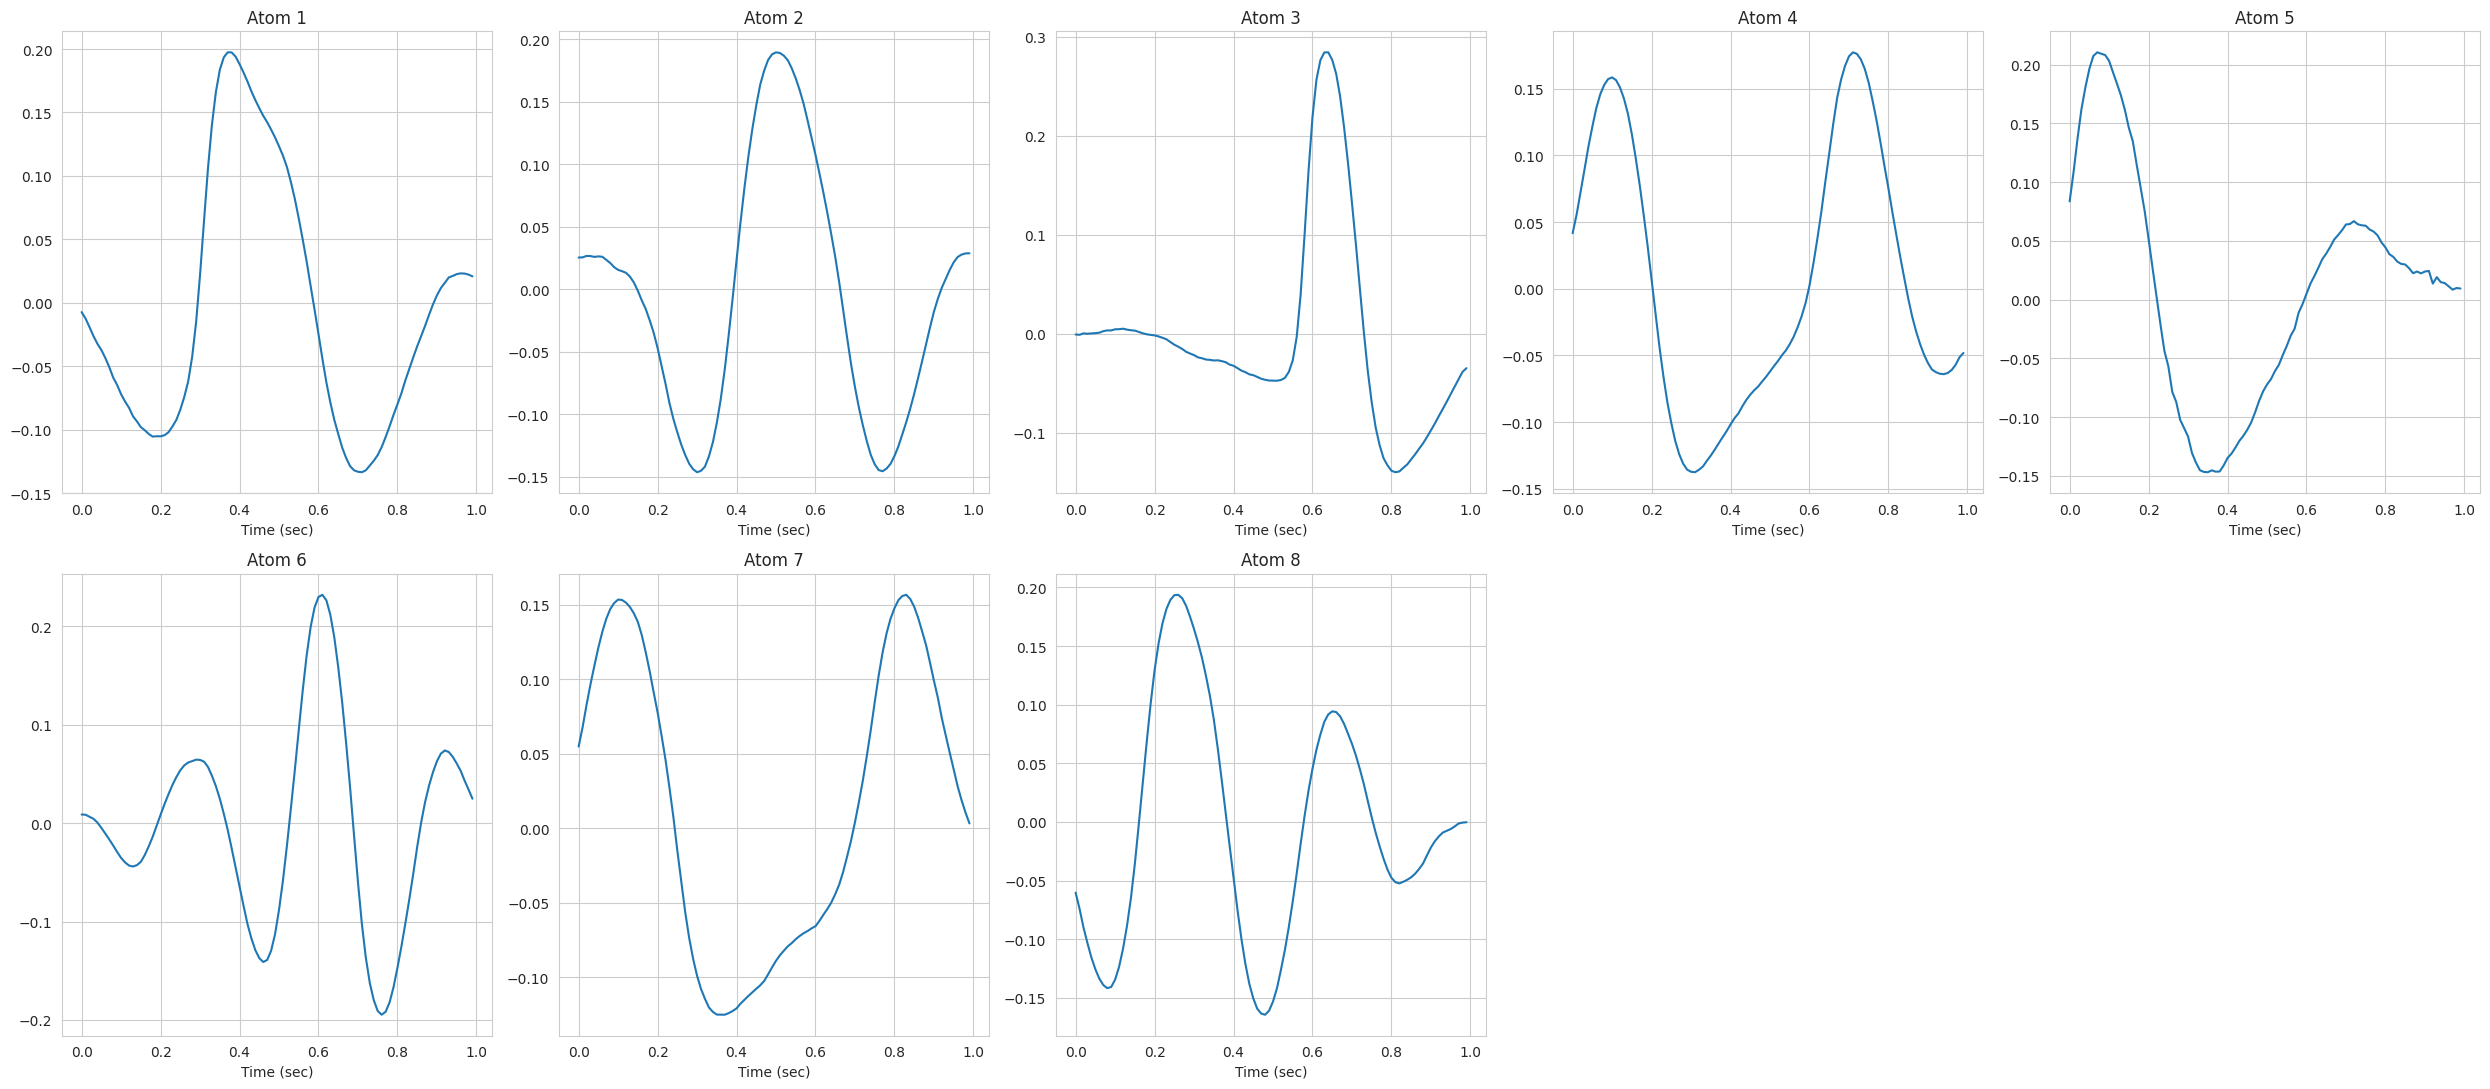

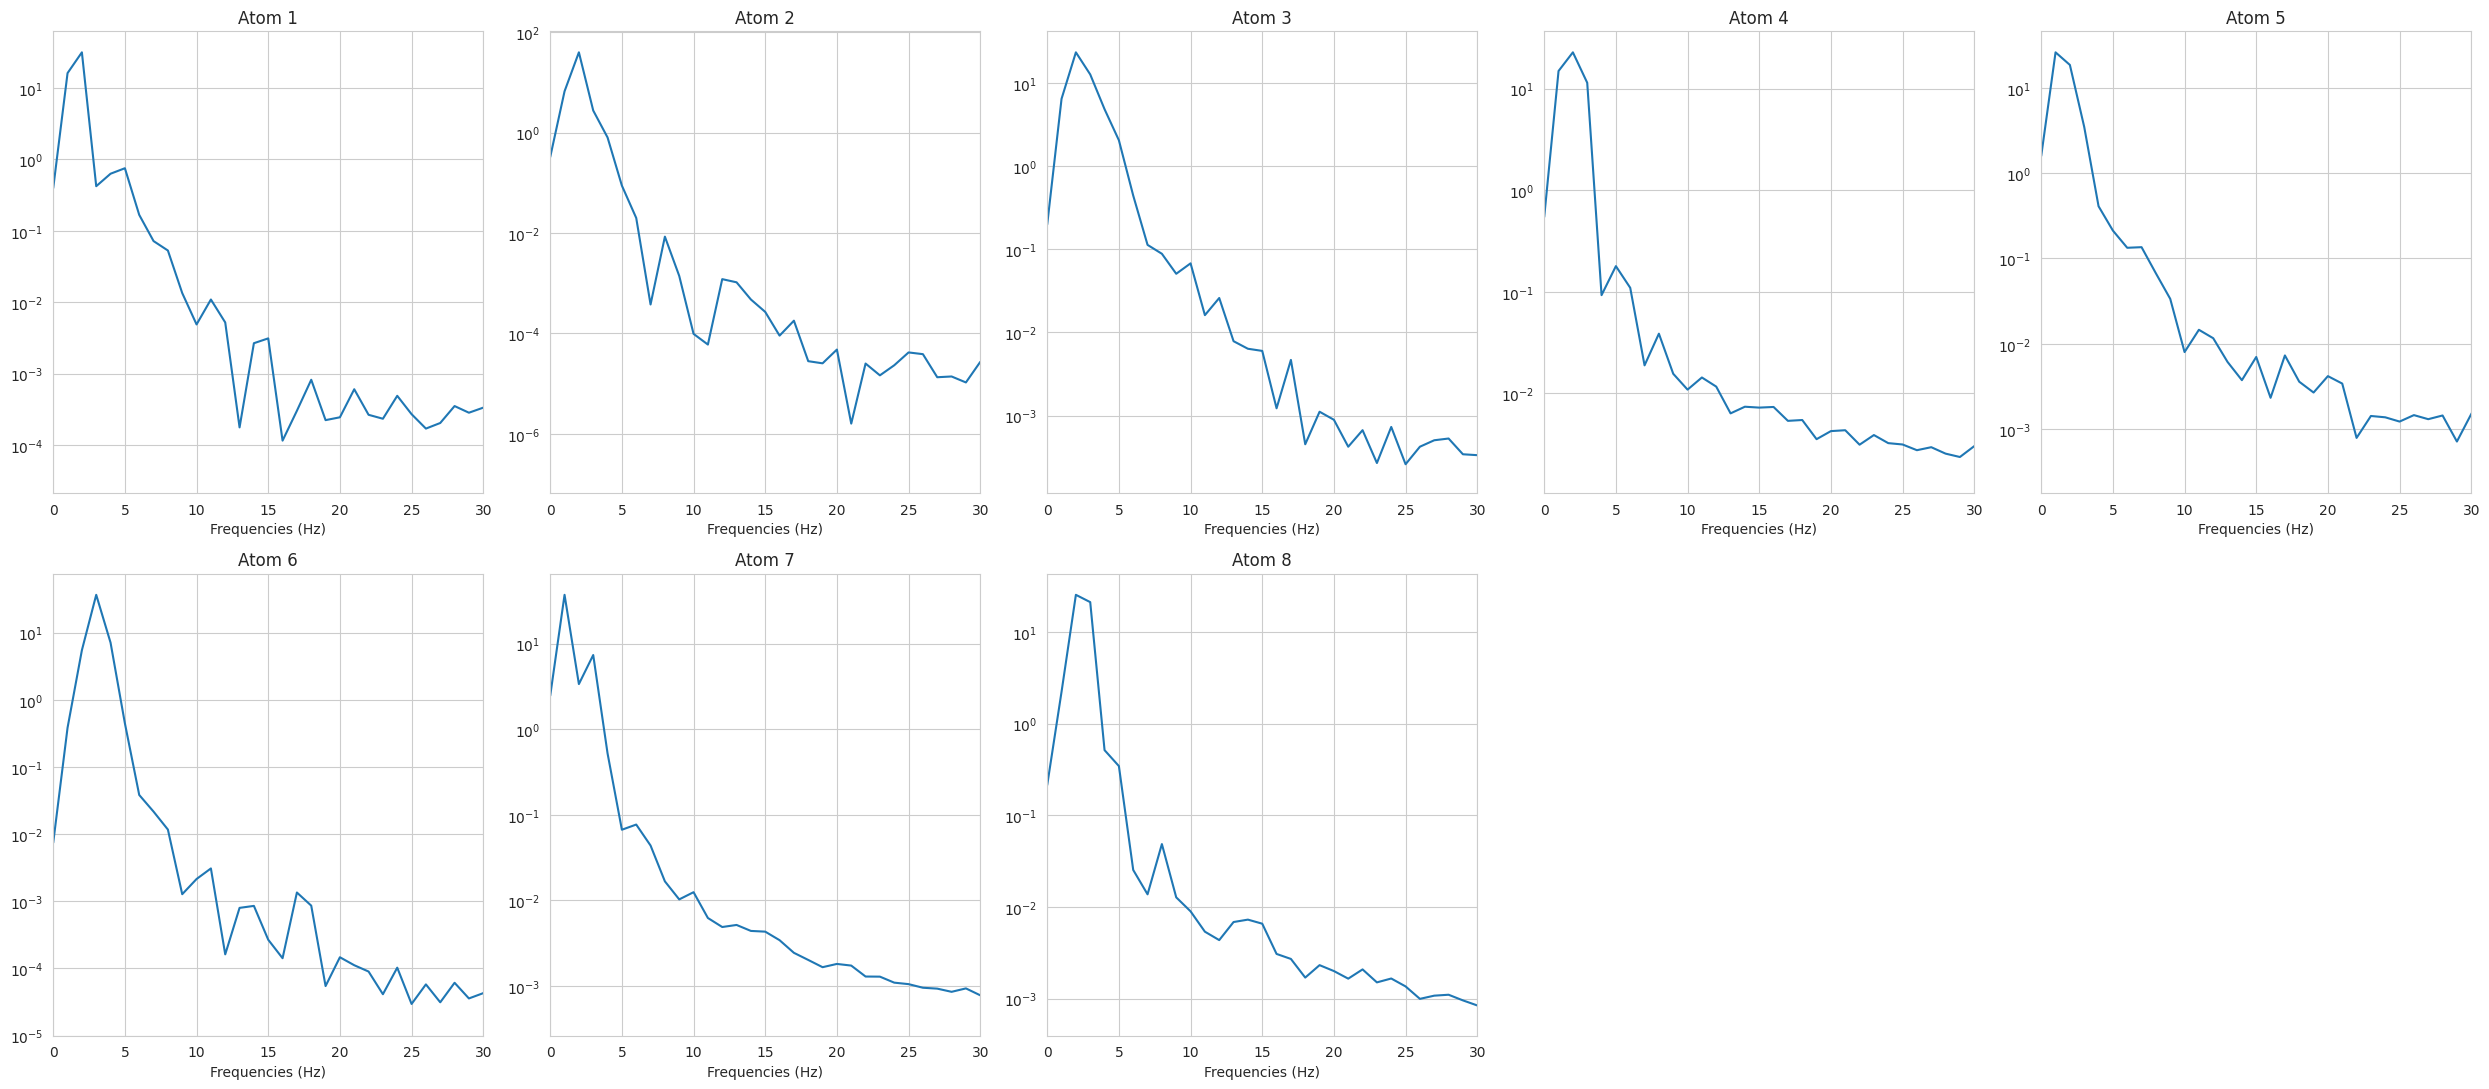

In [5]:
# Fit the model and learn rank1 atoms for all
cdl.fit(X)

###############################################################################
# display all
display_atoms(cdl, n_atoms, 2, 5, sfreq)
display_ffts(cdl, n_atoms, 2, 5, sfreq)
#display_topomap(cdl, n_atoms, 5, 5, info)


..................
[BatchCDL] Converged after 18 iteration, (dz, du) = 9.654e-05, 3.939e-05
[BatchCDL] Fit in 64.7s


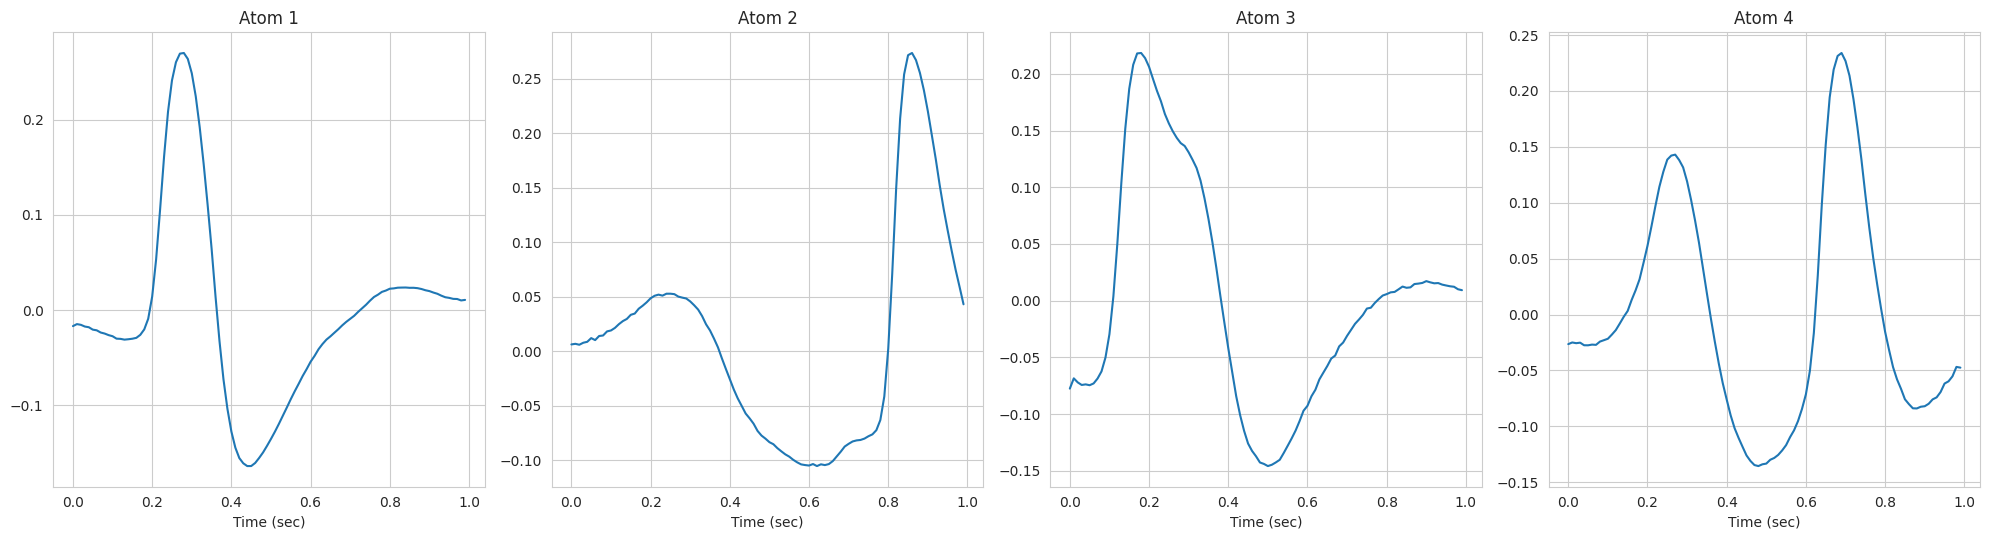

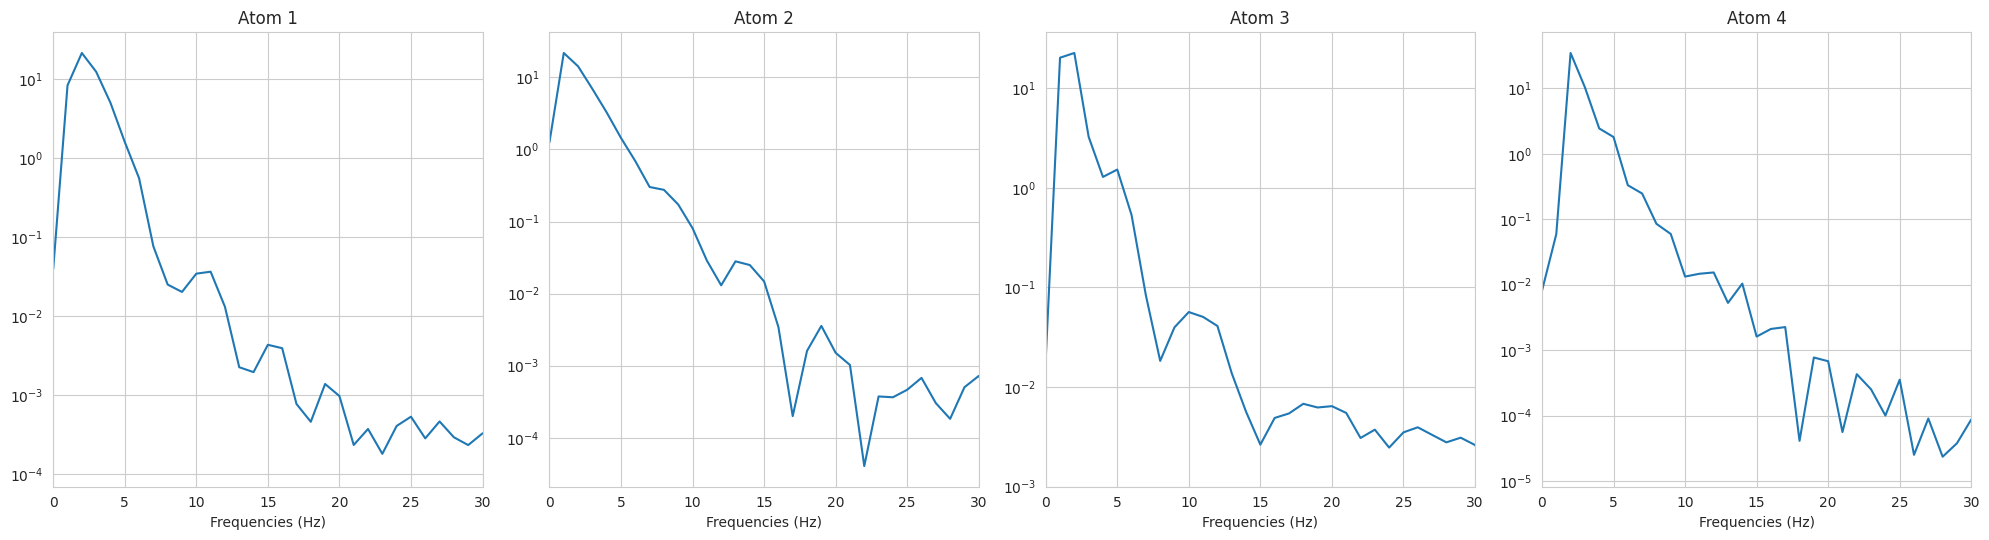

Atom 1
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 2
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[1.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 3
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 4
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
{0: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 1: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 2: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')},

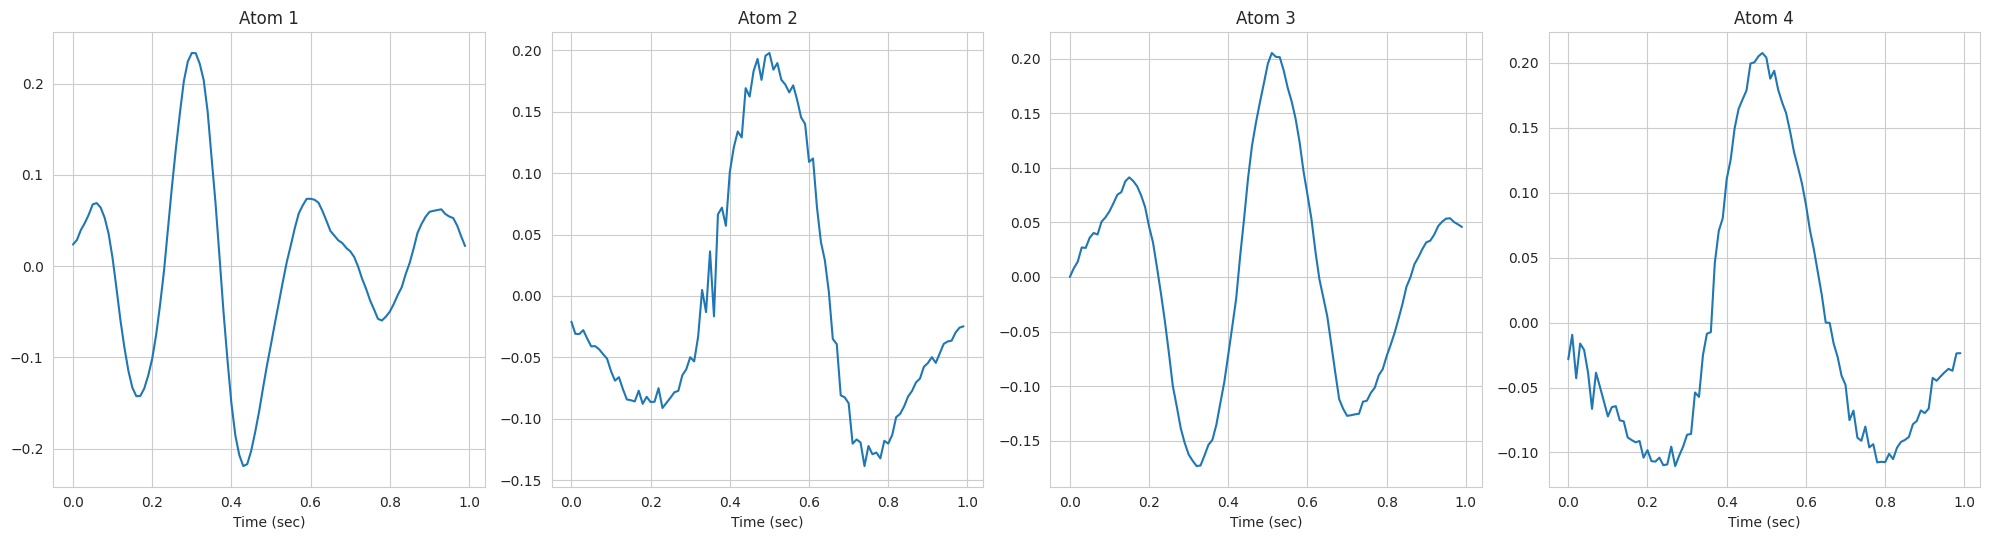

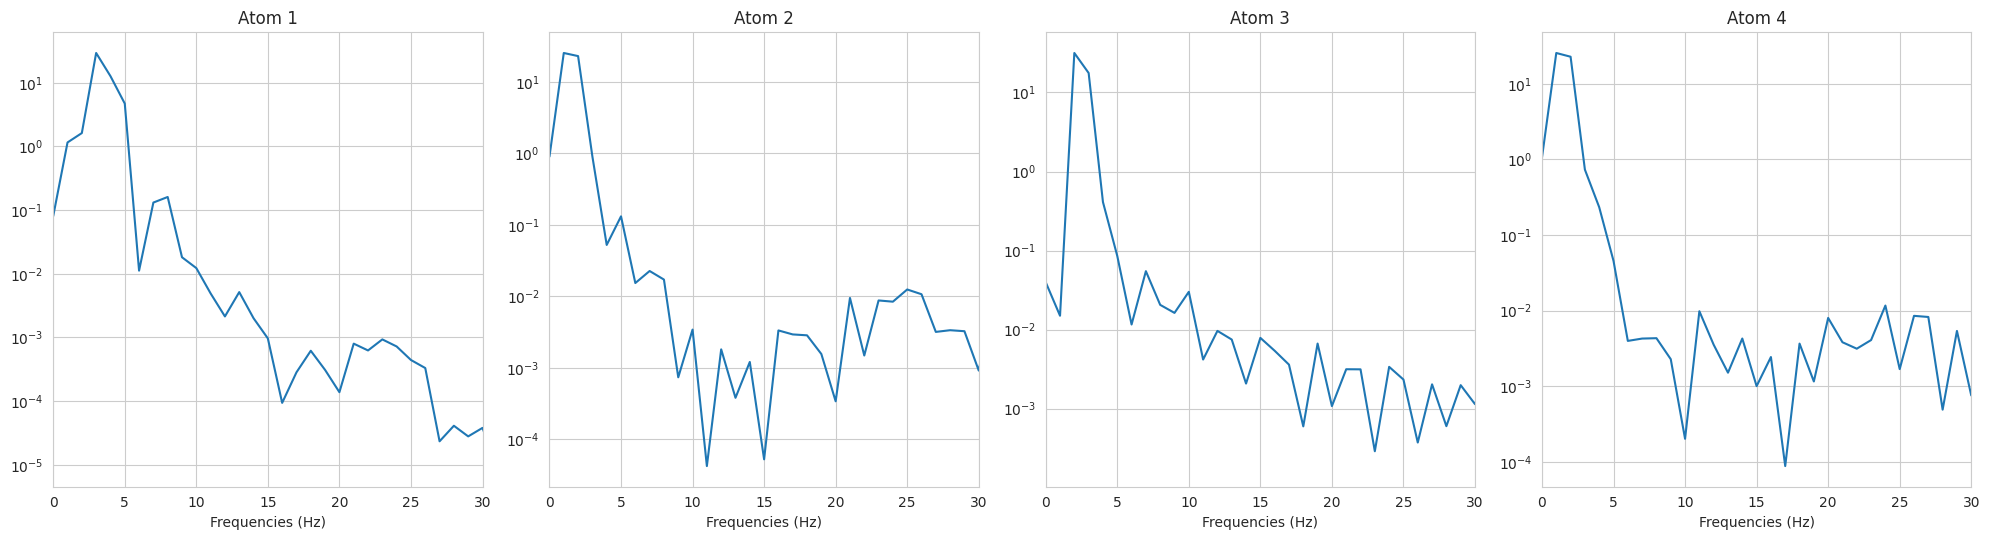

Atom 1
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[3.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 2
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[1.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 3
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 4
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[1.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
{0: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 1: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 2: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')},

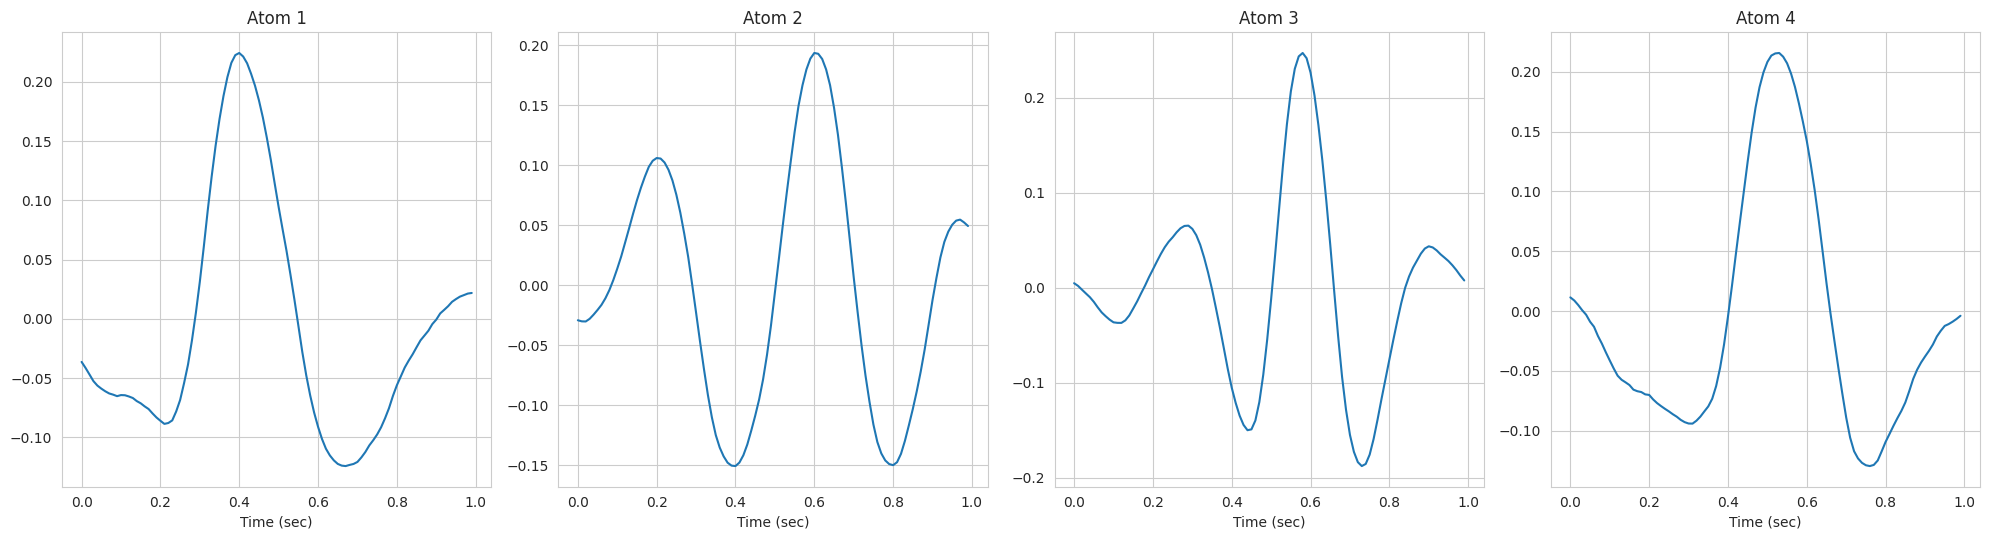

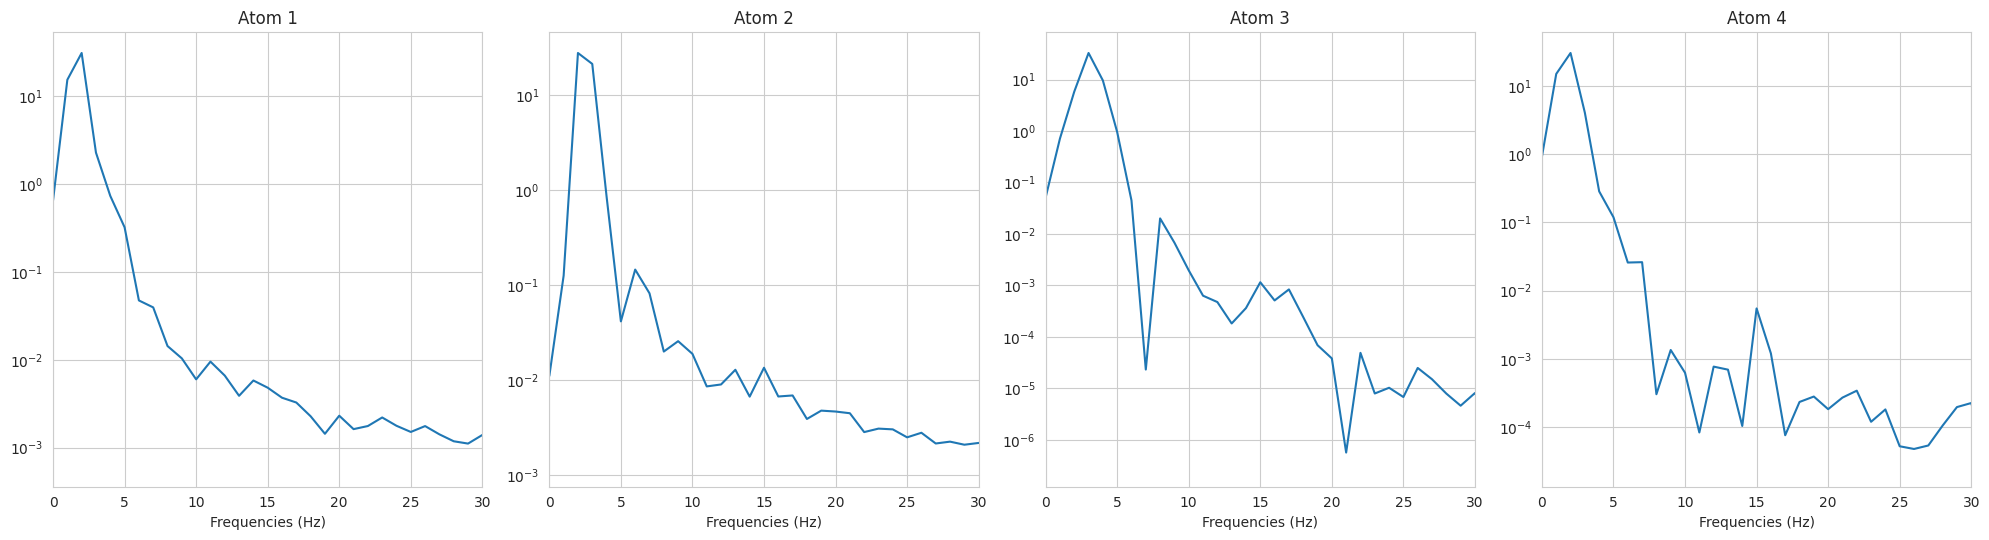

Atom 1
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 2
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 3
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[3.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 4
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
{0: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 1: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 2: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')},

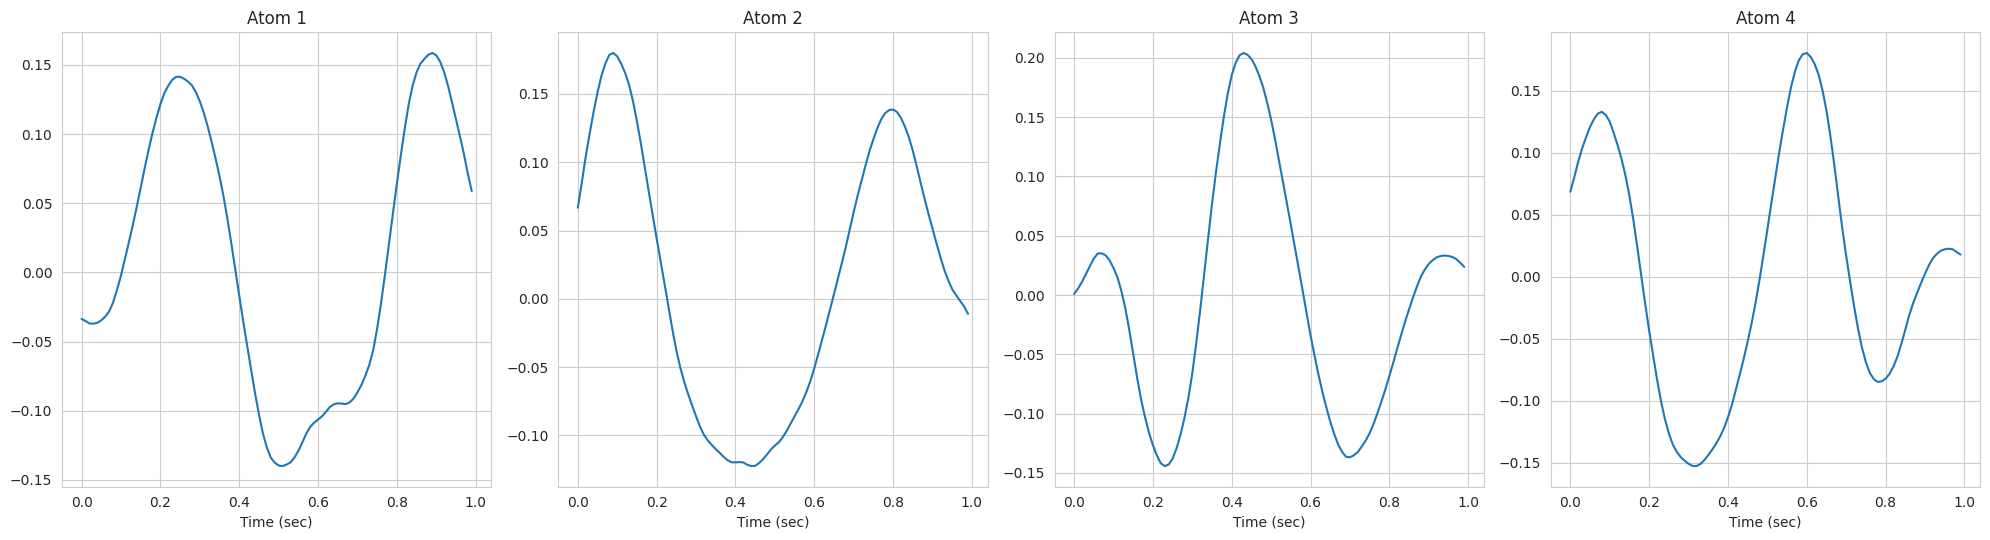

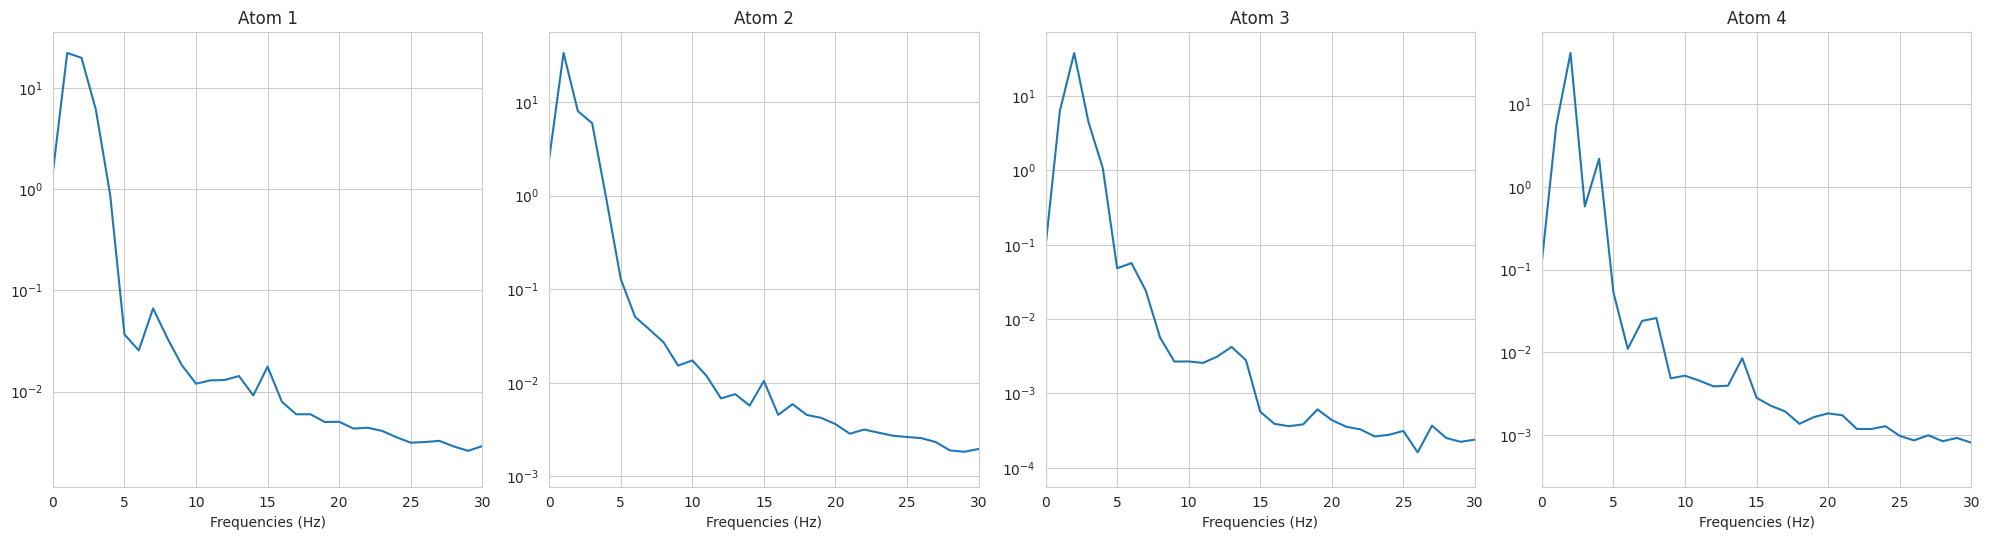

Atom 1
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[1.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 2
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[1.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 3
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 4
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
{0: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 1: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 2: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')},

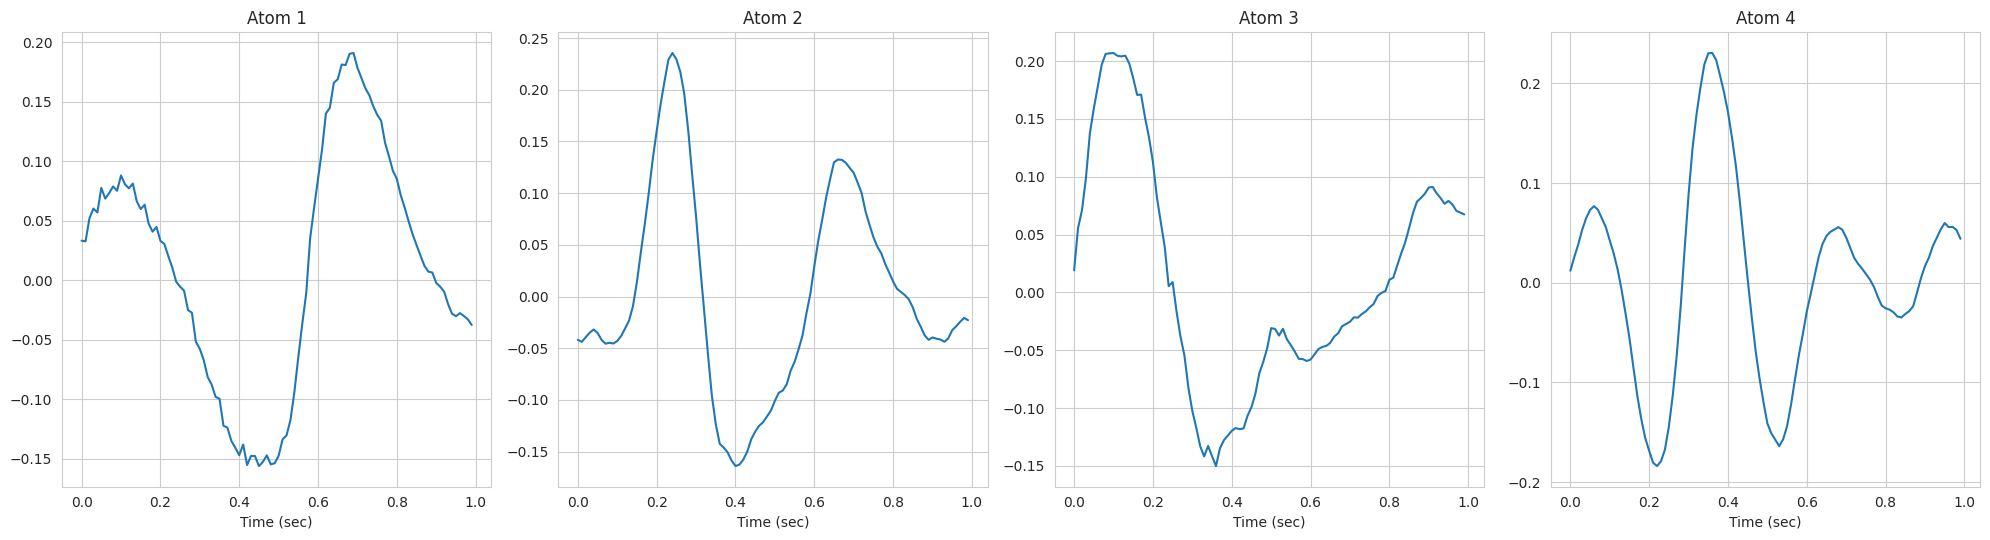

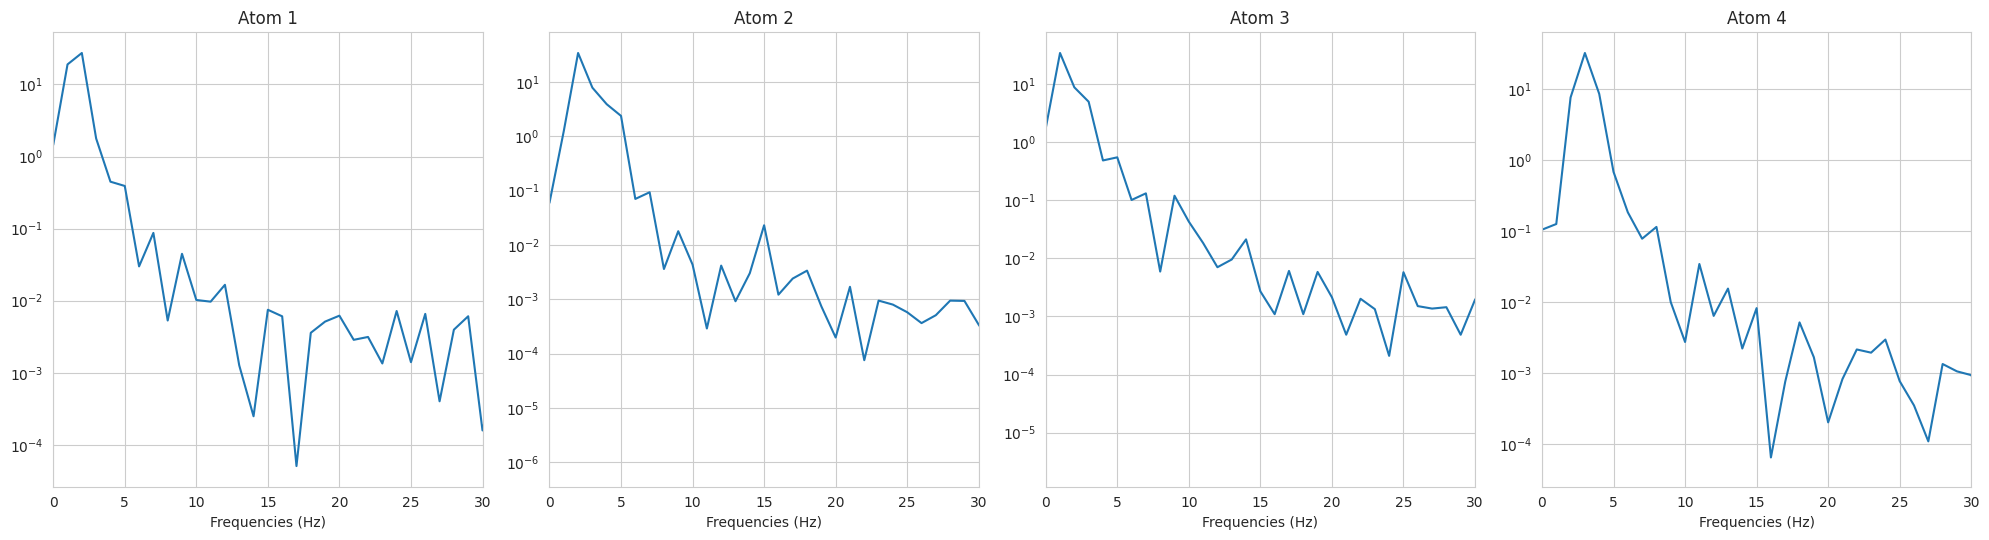

Atom 1
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 2
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[2.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 3
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[1.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 4
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[3.]
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
{0: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 1: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 2: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')},

In [9]:
# Now, we can see the patterns found for each

rhythms = {4:'Delta',
           8:'Theta',
           12:'Alpha-Mu',
           30:'Beta'}

for i, stage in enumerate(stages):

    X_stage = X_stages[stage]

    cdl_stage_ = copy.deepcopy(cdl_stage)
    cdl_stage_.fit(X_stage)

    # display found atoms
    display_atoms(cdl_stage_, n_atoms_stage, 1, 4, sfreq)
    display_ffts(cdl_stage_, n_atoms_stage, 1, 4, sfreq)

    main_rhythm = find_peaks(cdl_stage_, n_atoms_stage, info, figure=False, rows=1, n=1,
                             columns=4, sfreq=100, savefig=f'waves_per_region_{i}')

    print(main_rhythm)